In [17]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
data= pd.read_csv("H:/Downloads/titanic_data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


In [2]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#fig = plt.figure(figsize=(18,6), dpi=1600) 
#alpha=alpha_scatterplot = 0.2 
#alpha_bar_chart = 0.55

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

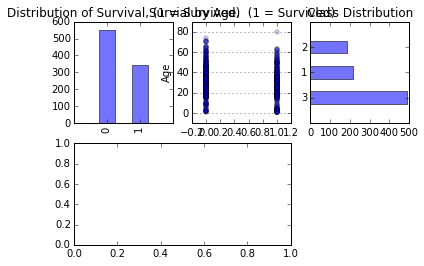

In [62]:
# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
data.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    
plt.subplot2grid((2,3),(0,1))
plt.scatter(data.Survived, data.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survial by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
data.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(data.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel desnsity estimate of the subset of the 1st class passanges's age
data.Age[data.Survived==1 and data.Pclass == 1].plot(kind='kde')    
data.Age[data.Pclass == 2].plot(kind='kde')
data.Age[data.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
data.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(data.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

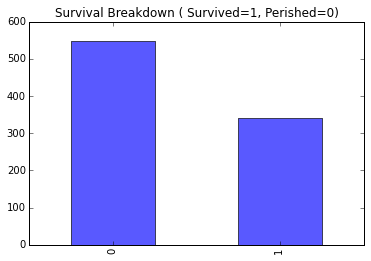

In [41]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
data.Survived.value_counts().plot(kind='bar', color="blue", alpha=.65)
#ax.set_ylim(-1, len(data.Survived.value_counts())) 
plt.title("Survival Breakdown ( Survived=1, Perished=0)")

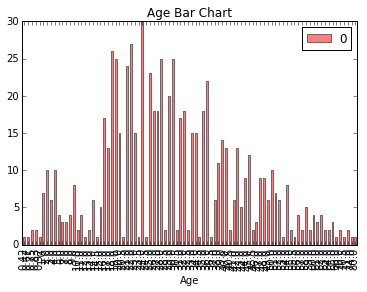

In [43]:
age_count=pd.DataFrame(data.Age.value_counts())
age_count= pd.DataFrame.sort_index(age_count)
plt.figure(figsize=(10,6))
#fig, ax = plt.subplots()
age_count.plot(kind='bar',color='red',alpha=0.5) 
plt.xlabel("Age")    
plt.title("Age Bar Chart")



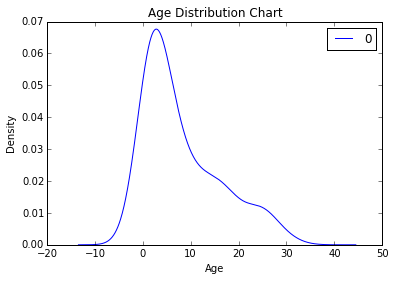

In [53]:
age_count.plot(kind='density')
plt.xlabel("Age")    
plt.title("Age Distribution Chart")


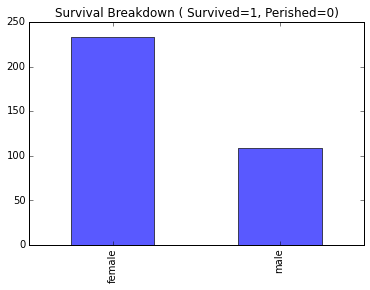

In [55]:
s= data['Survived']==1
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
data.Sex[s].value_counts().plot(kind='bar', color="blue", alpha=.65)
#ax.set_ylim(-1, len(data.Survived.value_counts())) 
plt.title("Gender breakdown from the survived population")

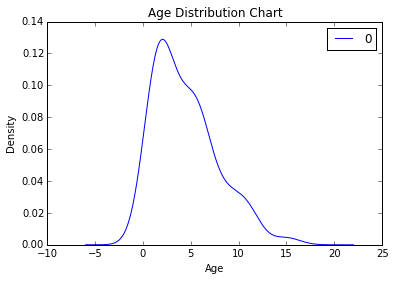

In [57]:
age_count1=pd.DataFrame(data.Age[s].value_counts()) ##age count of the survival
age_count1= pd.DataFrame.sort_index(age_count1)
age_count1.plot(kind='density')
plt.xlabel("Age")    
plt.title("Age Distribution Chart")

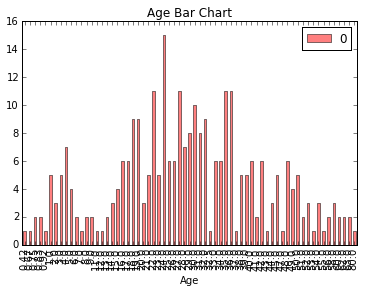

In [58]:
plt.figure(figsize=(10,6))
#fig, ax = plt.subplots()
age_count1.plot(kind='bar',color='red',alpha=0.5) 
plt.xlabel("Age")    
plt.title("Age Bar Chart")

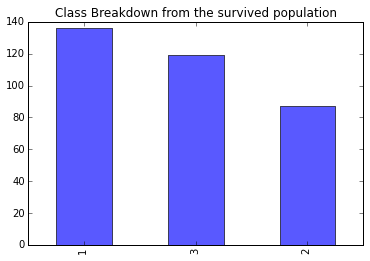

In [59]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
data.Pclass[s].value_counts().plot(kind='bar', color="blue", alpha=.65)
#ax.set_ylim(-1, len(data.Survived.value_counts())) 
plt.title("Class Breakdown from the survived population")

TypeError: 'NoneType' object is not callable

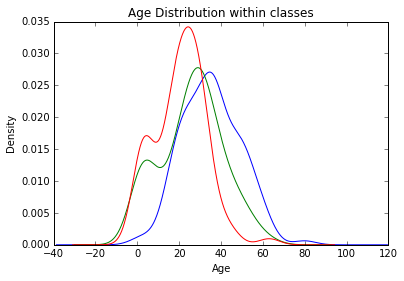

In [65]:
#Age and class distribution in the survived population
plt.figure(figsize=(6,4))
#p = data.Survived==1 and data.Pclass == 1
data.Age[(data.Survived==1) & (data.Pclass == 1)].plot(kind='kde')    
data.Age[(data.Survived==1) & (data.Pclass == 2)].plot(kind='kde')
data.Age[(data.Survived==1) & (data.Pclass == 3)].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')